## Dimensionality reduction practical

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import jaccard_score, f1_score
# PLEASE INSTALL PRETTYTABLE IF YOU HAVE NOT IT ALREADY
from prettytable import PrettyTable

## 0. Data preprocessing and visualization

1. Load the "ionosphere.csv" dataset
2. Clean the dataset, remove N/A s, uninformative columns if any
3. Construct and plot inter feature correlation matrice
4. Investigate distributions of each feature(make histogram plots), decide if the dataset needs normalization or not, if yes normalize it
5. Last column is the target column which we will predict. Map (b, g) -> (0, 1)
6. Split the dataset to train/test with 80/20 ratio


In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
X = pd.read_csv('ionosphere.csv', header=None)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


General information

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22

LET'S SEE NUMBER OF NA-s PER COLUMN

In [5]:
X.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
dtype: int64

TRANSFORM TARGET COLUMN TO 0 and 1

In [6]:
target_col = 34

In [7]:
X.loc[X[target_col] == 'b', target_col] = 0
X.loc[X[target_col] == 'g', target_col] = 1
X[target_col] = X[target_col].astype(int)

Construct and plot inter feature correlation matrice

In [8]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/home/karen/anaconda3/envs/ml_beginner_course/lib/python3.7/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/home/karen/anaconda3/envs/ml_beginner_course/lib/python3.7/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


Let's find features that dont change so much

In [9]:
X.nunique()

0       2
1       1
2     219
3     269
4     204
5     259
6     231
7     260
8     244
9     267
10    246
11    269
12    238
13    266
14    234
15    270
16    254
17    280
18    254
19    266
20    248
21    265
22    248
23    264
24    256
25    273
26    256
27    281
28    244
29    266
30    243
31    263
32    245
33    263
34      2
dtype: int64

In [10]:
X[0].value_counts() # its OK

1    313
0     38
Name: 0, dtype: int64

In [11]:
X[1].value_counts() # not OK

0    351
Name: 1, dtype: int64

As we see, column number 1 has all zeros, so we drop it

In [12]:
X.drop(1, axis=1,inplace=True)

For each feature print its correlation with target column

In [13]:
for feature in X.columns.difference([target_col]):
    print(f'Correlation of {feature} with {target_col}: ', X[[feature,target_col]].corr().iloc[0,1])

Correlation of 0 with 34:  0.4656135560410035
Correlation of 2 with 34:  0.5191447275586413
Correlation of 3 with 34:  0.12588441307658824
Correlation of 4 with 34:  0.5164766632928796
Correlation of 5 with 34:  0.14909868751790642
Correlation of 6 with 34:  0.4504286063301387
Correlation of 7 with 34:  0.20754437359508277
Correlation of 8 with 34:  0.2948523690138836
Correlation of 9 with 34:  0.1206335627168757
Correlation of 10 with 34:  0.16790758116003593
Correlation of 11 with 34:  0.1599401540612233
Correlation of 12 with 34:  0.18168168146705777
Correlation of 13 with 34:  0.1970408600446882
Correlation of 14 with 34:  0.20720095673281905
Correlation of 15 with 34:  0.1487748676701871
Correlation of 16 with 34:  0.08705979939862728
Correlation of 17 with 34:  0.11934591635746508
Correlation of 18 with 34:  0.11743533563388285
Correlation of 19 with 34:  0.03562017569025081
Correlation of 20 with 34:  0.21958288010097585
Correlation of 21 with 34:  -0.11638477257585228
Correlati

Drop columns, which have correlation with target_col less than 0.1

In [14]:
for feature in X.columns.difference([target_col]):
    if np.abs(X[[feature,target_col]].corr().iloc[0,1]) < 0.1:
        X.drop(feature, axis=1, inplace=True)

In [15]:
X

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,20,21,22,24,26,28,30,32,34
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,-0.38542,0.58212,0.56971,-0.29674,0.36946,0.56811,0.41078,0.21266,0.42267,0.18641,1
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,-0.62237,0.33109,-0.13151,-0.45300,-0.18056,-0.20332,-0.20468,-0.19040,-0.16626,-0.13738,0
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,-0.13644,0.75535,0.70887,-0.27502,0.43385,0.57528,0.58984,0.43100,0.60436,0.56045,1
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,-0.39330,-1.00000,-0.69975,1.00000,0.00000,1.00000,0.51613,1.00000,0.25682,-0.32382,0
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,-0.21780,0.45107,0.05982,-0.35575,0.02309,0.03286,0.13290,0.02431,-0.05707,-0.04608,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,-0.02101,0.96639,0.87605,0.01155,0.77521,0.95378,0.83479,1.00000,0.86660,0.90546,1
347,1,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.00140,0.94834,0.92670,0.08412,0.93124,0.94520,0.93522,0.93159,0.94066,0.91483,1
348,1,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.02004,0.93784,0.91406,0.07677,0.89470,0.93988,0.92489,0.92120,0.92459,0.92697,1
349,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,-0.00884,0.80773,0.88729,0.01215,0.92155,0.91050,0.89147,0.82983,0.96022,0.87403,1


Plotting histograms of each feature

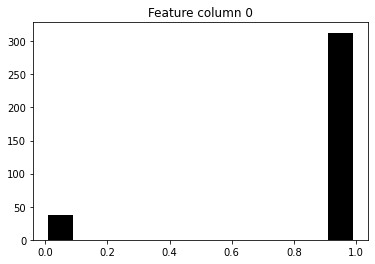

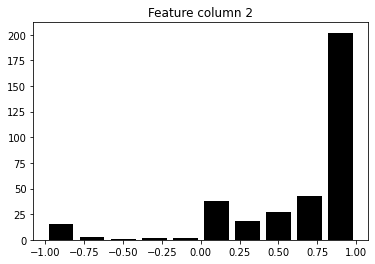

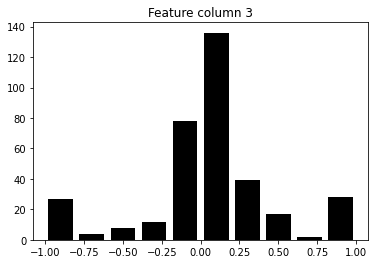

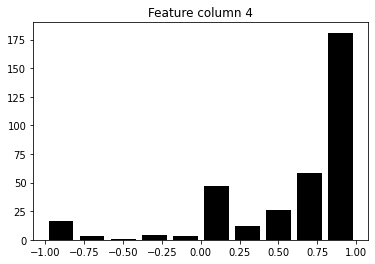

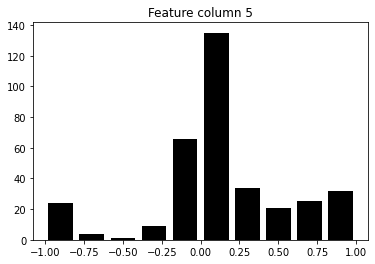

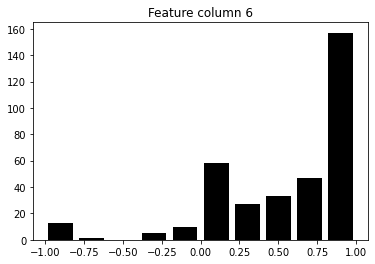

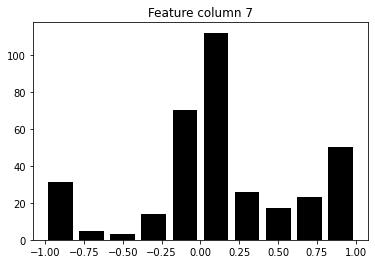

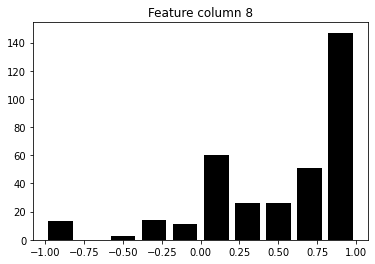

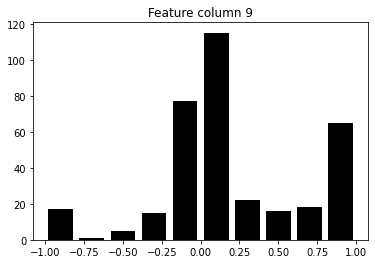

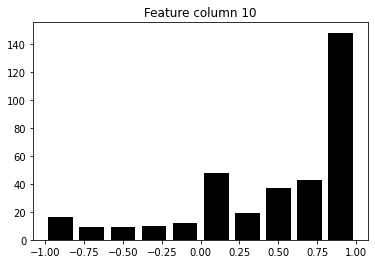

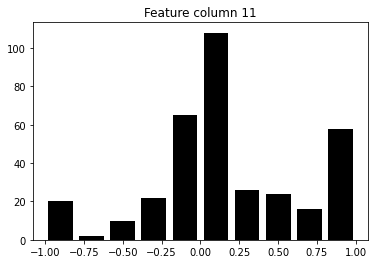

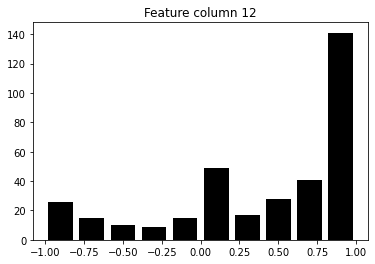

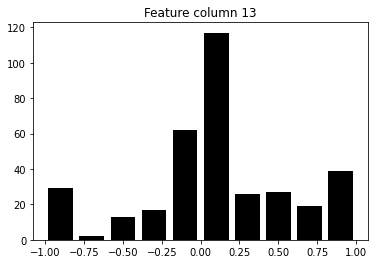

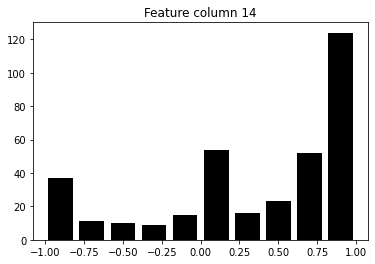

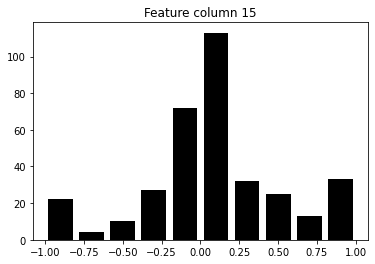

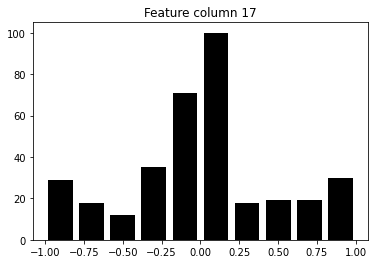

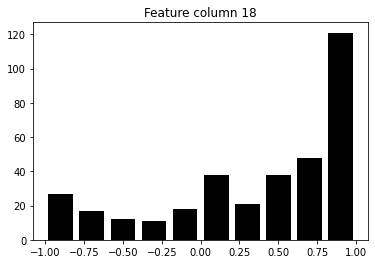

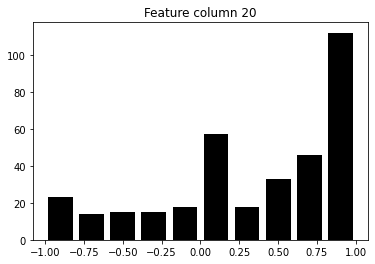

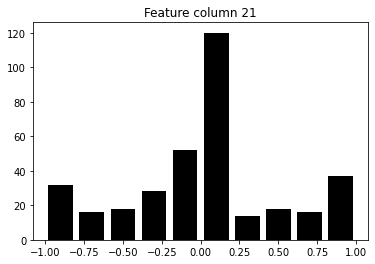

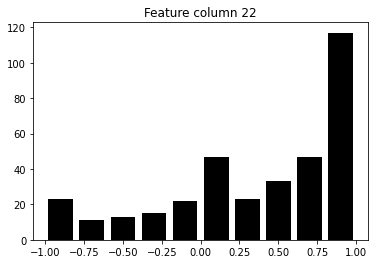

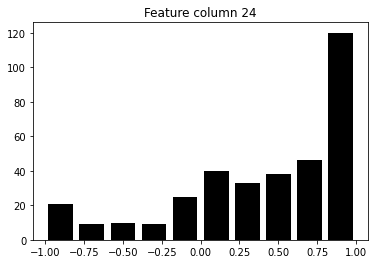

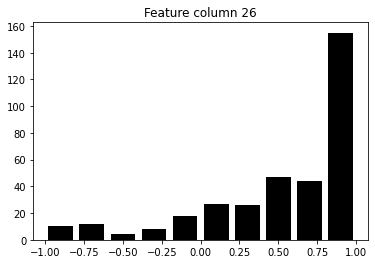

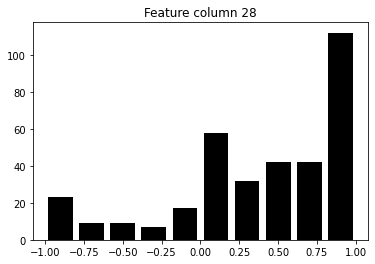

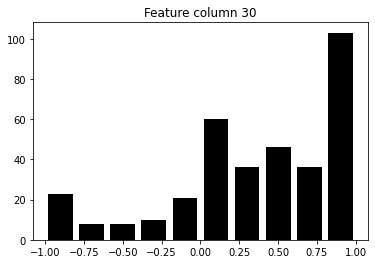

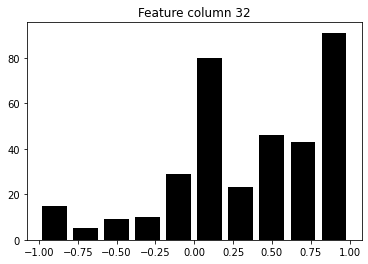

In [16]:
features = X.columns.difference([target_col])
for feature in features:
    plt.hist(X[feature],histtype = "bar", rwidth = 0.8, color = "black")
    plt.title(f'Feature column {feature}')
    plt.show()

In [17]:
y = X[target_col]
X.drop(target_col, inplace=True, axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((280, 25), (71, 25), (280,), (71,))

## 1. Classification baseline

Using Logistic Regression of sklearn, run a grid search on parameter C from the values [0.01, 0.1, 1., 10, 100]. Select the best model by running 5 Fold cross validation on train set according to f1 score.

In [20]:
param_grid = [ {'C': [0.01, 0.1, 1, 10, 100]} ]
clf = GridSearchCV(LogisticRegression(), param_grid, scoring='f1')
clf.fit(X_train, y_train)
best_C = clf.best_params_.get('C')
best_C

100

In [21]:
X

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,20,21,22,24,26,28,30,32
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,-0.38542,0.58212,0.56971,-0.29674,0.36946,0.56811,0.41078,0.21266,0.42267,0.18641
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,-0.62237,0.33109,-0.13151,-0.45300,-0.18056,-0.20332,-0.20468,-0.19040,-0.16626,-0.13738
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,-0.13644,0.75535,0.70887,-0.27502,0.43385,0.57528,0.58984,0.43100,0.60436,0.56045
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,-0.39330,-1.00000,-0.69975,1.00000,0.00000,1.00000,0.51613,1.00000,0.25682,-0.32382
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,-0.21780,0.45107,0.05982,-0.35575,0.02309,0.03286,0.13290,0.02431,-0.05707,-0.04608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,-0.02101,0.96639,0.87605,0.01155,0.77521,0.95378,0.83479,1.00000,0.86660,0.90546
347,1,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.00140,0.94834,0.92670,0.08412,0.93124,0.94520,0.93522,0.93159,0.94066,0.91483
348,1,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.02004,0.93784,0.91406,0.07677,0.89470,0.93988,0.92489,0.92120,0.92459,0.92697
349,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,-0.00884,0.80773,0.88729,0.01215,0.92155,0.91050,0.89147,0.82983,0.96022,0.87403


## 2. Dimensionality Reduction PCA

1. Project data to dimension $K_1$ so that total explained variance ratio is $\geq$0.9
2. Project data to dimension $K_2$ so that total explained variance ratio is $\geq$0.99
3. Train Logistic Regression with the best C from task $\bf 1$ on projected data that you got in $\bf 2.1$ and $\bf 2.2$
4. Compare Jaccard Index and F1 score of the three models.
5. Investigate the learned coefficients of best model that you found in $\bf 1$, make two training sets by selecting $K_1$, $K_2$ most important features.
6. Train Logistic Regression with the best C from task $\bf 1$ on datasets that you made in $\bf 2.5$, and compare Jaccard Index and F1 score with respective models from $\bf 2.3$

### STEP 1 and 2

In [22]:
pca = PCA(n_components=X.shape[1])
pca.fit(X_train)
ratios = pca.explained_variance_ratio_
ratios

array([0.36399569, 0.09957217, 0.08969299, 0.05152183, 0.04625866,
       0.03910474, 0.03739669, 0.03459695, 0.02690212, 0.0252018 ,
       0.02232649, 0.02147823, 0.02040731, 0.01805833, 0.01658106,
       0.01370931, 0.01275958, 0.01160717, 0.00943677, 0.00856398,
       0.00760304, 0.00674315, 0.0062812 , 0.00577541, 0.00442532])

In [23]:
def find_K(ratios, threshold=0.9):
    n = len(ratios)
    for i in range(1, n):
        if ratios[:i].sum()>=threshold:
            return i

In [24]:
K1 = find_K(ratios)
K2 = find_K(ratios, threshold=0.99)

In [25]:
K1,K2

(15, 24)

### STEP 3

In [26]:
pca_K1 = PCA(n_components=K1)
pca_K2 = PCA(n_components=K2)

In [27]:
X_train1 = pca_K1.fit_transform(X_train)
X_train2 = pca_K2.fit_transform(X_train)

In [28]:
raw_clf = LogisticRegression(C=best_C).fit(X_train, y_train)
clf_K1 = LogisticRegression(C=best_C).fit(X_train1, y_train)
clf_K2 = LogisticRegression(C=best_C).fit(X_train2, y_train)

### STEP 4

In [29]:
X_test1 = pca_K1.transform(X_test)
X_test2 = pca_K2.transform(X_test)

In [30]:
y_pred_raw = raw_clf.predict(X_test)
y_pred1 = clf_K1.predict(X_test1)
y_pred2 = clf_K2.predict(X_test2)

In [31]:
y_test.shape, y_pred_raw.shape, y_pred1.shape, y_pred2.shape

((71,), (71,), (71,), (71,))

In [32]:
t = PrettyTable(['Metrics','raw Log. Regr.', 'Log. Regr. with K1', 'Log. Regr. with K2'])
t.add_row(['Jaccard Score', jaccard_score(y_test,y_pred_raw), jaccard_score(y_test,y_pred1),jaccard_score(y_test,y_pred2)])
t.add_row(['F1 score', f1_score(y_test,y_pred_raw), f1_score(y_test, y_pred1), f1_score(y_test, y_pred2)])
print(t)


+---------------+--------------------+--------------------+--------------------+
|    Metrics    |   raw Log. Regr.   | Log. Regr. with K1 | Log. Regr. with K2 |
+---------------+--------------------+--------------------+--------------------+
| Jaccard Score | 0.8392857142857143 | 0.8214285714285714 | 0.8392857142857143 |
|    F1 score   | 0.912621359223301  | 0.9019607843137256 | 0.912621359223301  |
+---------------+--------------------+--------------------+--------------------+


### STEP 5

Let's choose  from PC1 K1(15) and K2(23) indexes of important features

In [33]:
df1 = pd.Series(np.abs(pca_K1.components_[0]))
mask1 = df1.isin(df1.nlargest(K1))
indices1 = df1[mask1].index.values

In [34]:
indices1

array([ 3,  5,  6,  7,  9, 11, 13, 16, 17, 19, 20, 21, 22, 23, 24])

In [35]:
df2 = pd.Series(np.abs(pca_K2.components_[0]))
mask2 = df2.isin(df2.nlargest(K2))
indices2 = df2[mask2].index.values
df2

0     0.025092
1     0.120519
2     0.073258
3     0.179310
4     0.073999
5     0.203437
6     0.142004
7     0.231770
8     0.130322
9     0.256716
10    0.108779
11    0.315728
12    0.077414
13    0.348051
14    0.071318
15    0.008061
16    0.305784
17    0.320279
18    0.059625
19    0.282178
20    0.231212
21    0.166089
22    0.209233
23    0.220707
24    0.217020
dtype: float64

In [36]:
indices2

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [37]:
X_train

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,20,21,22,24,26,28,30,32
155,1,0.72414,-0.01084,0.79704,0.01084,0.80000,0.00197,0.79015,0.01084,0.78424,-0.00985,0.83350,0.03251,0.85123,0.01675,-0.00788,0.79113,0.75961,0.03350,0.74778,0.72611,0.78041,0.74089,0.82956,0.79015
265,1,0.91767,0.18198,0.86090,0.35543,0.72873,0.45747,0.60425,0.69865,0.50376,0.74922,0.36100,0.81795,0.15664,0.83558,0.85210,-0.16390,-0.35996,0.76193,-0.43087,-0.53140,-0.60328,-0.64511,-0.65710,-0.64056
315,1,0.88085,0.35232,0.68389,0.65128,0.34816,0.79784,0.05832,0.90842,-0.29784,0.86490,-0.62635,0.69590,-0.77106,0.39309,0.08408,-0.81641,-0.64579,-0.50022,-0.39766,-0.11147,0.17041,0.40675,0.56626,0.62765
60,1,1.00000,0.09771,1.00000,0.12197,1.00000,0.22574,0.98602,0.09237,0.94930,0.19211,0.92992,0.24288,0.89241,0.28343,0.26721,0.83656,0.83393,0.31698,0.74829,0.76193,0.68452,0.62764,0.56791,0.54252
82,1,0.92277,0.07804,0.92679,0.16251,0.89702,0.24618,0.84111,0.35197,0.78801,0.42196,0.70716,0.46983,0.70796,0.56476,0.64200,0.51247,0.39903,0.66975,0.34232,0.23693,0.18765,0.09694,0.02735,-0.04023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,1,0.64947,-0.07896,0.58264,-0.14380,-0.13129,-0.21384,0.29796,0.04403,0.38096,-0.26339,0.28931,-0.31997,0.03459,-0.18947,-0.29441,0.15196,0.09513,-0.31525,0.06556,0.03004,-0.00046,-0.02612,-0.04717,0.01336
284,1,0.29073,0.10025,0.23308,0.17293,0.03759,0.34336,0.12030,0.26316,0.06266,0.21303,-0.04725,0.12767,-0.06333,0.07907,0.04097,-0.05431,-0.04166,-0.00280,-0.02876,-0.01755,-0.00886,-0.00280,0.00096,0.00290
118,1,0.39286,0.52381,-0.78824,0.11342,-0.16628,-0.76378,0.66667,0.01190,0.82143,0.40476,-0.67230,0.30729,-0.34797,-0.63668,0.15476,0.54762,-0.51830,0.44961,-0.47651,0.32143,0.51971,0.57143,-0.54891,0.25441
198,1,0.36876,-1.00000,-1.00000,-1.00000,-0.07661,1.00000,1.00000,0.95041,0.74597,-0.38710,-1.00000,-0.79313,-0.09677,1.00000,0.46502,0.31755,-0.14343,-0.20188,-0.11976,0.03021,0.03443,-0.00403,-0.00761,0.00015


In [38]:
X_train11 = X_train.iloc[:,indices1]
X_test11 = X_test.iloc[:, indices1]

In [39]:
X_train22 = X_train.iloc[:,indices2]
X_test22 = X_test.iloc[:, indices2]

### STEP 6

In [40]:
clf_K11 = LogisticRegression(C=best_C).fit(X_train11, y_train)
clf_K22 = LogisticRegression(C=best_C).fit(X_train22, y_train)

In [41]:
y_pred11 = clf_K11.predict(X_test11)
y_pred22 = clf_K22.predict(X_test22)

In [42]:
t = PrettyTable(['Metrics','LR with PCA, K1', 'LR without PCA, K1', 'LR with PCA, K2', 'LR without PCA, K2'])
t.add_row(['Jaccard Score', jaccard_score(y_test,y_pred1),jaccard_score(y_test,y_pred11), jaccard_score(y_test,y_pred2), jaccard_score(y_test,y_pred22)])
t.add_row(['F1 score', f1_score(y_test,y_pred1),f1_score(y_test,y_pred11), f1_score(y_test,y_pred2), f1_score(y_test,y_pred22)])
print(t)


+---------------+--------------------+--------------------+--------------------+--------------------+
|    Metrics    |  LR with PCA, K1   | LR without PCA, K1 |  LR with PCA, K2   | LR without PCA, K2 |
+---------------+--------------------+--------------------+--------------------+--------------------+
| Jaccard Score | 0.8214285714285714 | 0.8103448275862069 | 0.8392857142857143 | 0.8245614035087719 |
|    F1 score   | 0.9019607843137256 | 0.8952380952380952 | 0.912621359223301  | 0.9038461538461537 |
+---------------+--------------------+--------------------+--------------------+--------------------+


## 3. Dimensionality Reduction LDA

1. Project data to dimension $K_1$ so that total explained variance ratio is $\geq$0.9
2. Project data to dimension $K_2$ so that total explained variance ratio is $\geq$0.99
3. Train Logistic Regression with the best C from task $\bf 1$ on projected data that you got in $\bf 3.1$ and $\bf 3.2$
4. Compare Jaccard Index and F1 score with the previous models in tasks $\bf 1$ and $\bf 2$.
5. Investigate the learned coefficients of best model that you found in $\bf 1$, make two training sets by selecting $K_1$, $K_2$ most important features.
6. Train Logistic Regression with the best C from task $\bf 1$ on datasets that you made in $\bf 3.5$, and compare Jaccard Index and F1 score with respective models from $\bf 3.3$

In [47]:
from lda_skeleton import My_LDA
N = X_train.shape[1]
lda = My_LDA(K=N)
lda.fit(X_train.values, y_train.values)
ratios = lda.explained_variance_ratio_
K1 = find_K(ratios)
K2 = find_K(ratios, threshold=0.99)

In [49]:
K1,K2

(1, 1)

In [ ]:
#something is wrong with LDA

## 4. 2D plots

Make 4 plots
1. Select 2 most important features of the best Logistic Regression model from task $\bf 1$. Make scatter plot using these two features, and color according to target variable.
2. Select first two principal components from task $\bf 2.2$.Make scatter plot using these two components, and color according to target variable.
3. Select first two linear discriminant components from task $\bf 3.2$.Make scatter plot using these two components, and color according to target variable.
4. Project data to 2D space and plot it, again by coloring according to target variable.